# Ejercicio con regularizadores

MARTA AMORES

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

In [ ]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
partial_train_images = train_images[:49999]
validation_images = train_images[50000:]
partial_train_labels = train_labels[:49999]
validation_labels = train_labels[50000:]


In [ ]:
def crea_modelo(regularizador):
  model = models.Sequential()
  if regularizador == 0:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  
  elif regularizador == 1:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador == 2:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador == 3:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador ==4:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dropout(0.5))
  else: 
    print('El numero debe estar entre 0-4')
    return 0 
  model.add(layers.Dense(10, activation = 'softmax'))
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model.summary()
  return model

In [ ]:
def compila_modelo(model): 
 model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics='accuracy')
 return model

In [ ]:
def entrena_modelo(model):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history=model.fit(train_images, train_labels,
          batch_size=128,
          epochs=30,
          validation_data=(validation_images, validation_labels))
  return history

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [ ]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network0 = compila_modelo(network0)

In [ ]:
historia0 = entrena_modelo(network0)

Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.2611 - accuracy: 0.9244 - val_loss: 0.1067 - val_accuracy: 0.9720
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1046 - accuracy: 0.9690 - val_loss: 0.0626 - val_accuracy: 0.9816
Epoch 3/30
469/469 [==============================] - 3s 5ms/step - loss: 0.0691 - accuracy: 0.9794 - val_loss: 0.0392 - val_accuracy: 0.9899
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0303 - val_accuracy: 0.9917
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0248 - val_accuracy: 0.9935
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0157 - val_accuracy: 0.9960
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 

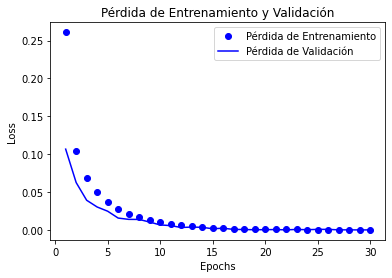

In [ ]:
pinta_perdida_entrenamiento_validacion(historia0)

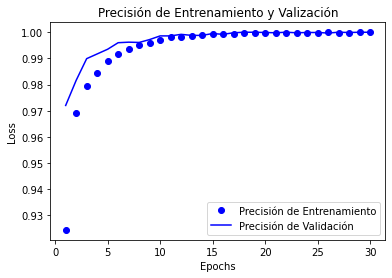

In [ ]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [ ]:
network1 = crea_modelo(1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 1.9398 - accuracy: 0.8505 - val_loss: 1.1238 - val_accuracy: 0.8361
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.9167 - accuracy: 0.8873 - val_loss: 0.8453 - val_accuracy: 0.9003
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7898 - accuracy: 0.9099 - val_loss: 0.7711 - val_accuracy: 0.9113
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7176 - accuracy: 0.9222 - val_loss: 0.6842 - val_accuracy: 0.9264
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6717 - accuracy: 0.9319 - val_loss: 0.6535 - val_accuracy: 0.9373
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6423 - accuracy: 0.9356 - val_loss: 0.5889 - val_accuracy: 0.9490
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6152 - accuracy: 0.9401 - val_loss: 0.6110 - val_accuracy: 0.9394
Epoch 

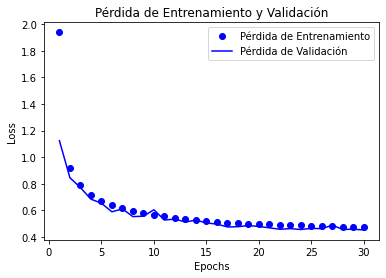

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

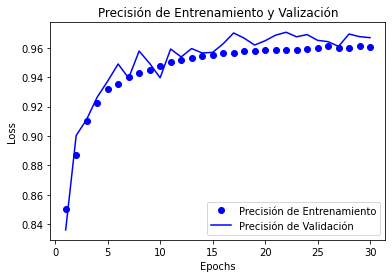

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [ ]:
network2 = crea_modelo(2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4862 - accuracy: 0.9192 - val_loss: 0.2553 - val_accuracy: 0.9618
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2422 - accuracy: 0.9581 - val_loss: 0.1841 - val_accuracy: 0.9721
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1990 - accuracy: 0.9644 - val_loss: 0.1681 - val_accuracy: 0.9726
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1767 - accuracy: 0.9688 - val_loss: 0.1446 - val_accuracy: 0.9786
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1651 - accuracy: 0.9717 - val_loss: 0.1527 - val_accuracy: 0.9743
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1585 - accuracy: 0.9726 - val_loss: 0.1369 - val_accuracy: 0.9786
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1522 - accuracy: 0.9726 - val_loss: 0.1336 - val_accuracy: 0.9775
Epoch 

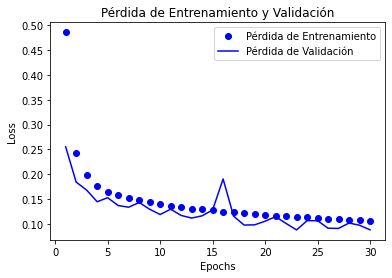

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

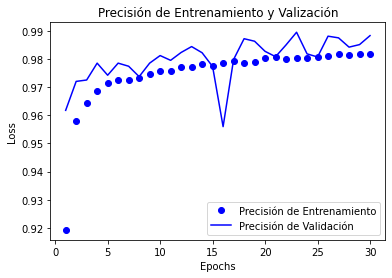

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [ ]:
network3 = crea_modelo(3)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 2.1334 - accuracy: 0.8331 - val_loss: 1.0464 - val_accuracy: 0.8661
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 1.0029 - accuracy: 0.8706 - val_loss: 0.8789 - val_accuracy: 0.9013
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.8941 - accuracy: 0.8891 - val_loss: 0.8856 - val_accuracy: 0.8818
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.8290 - accuracy: 0.9018 - val_loss: 0.7911 - val_accuracy: 0.9109
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7795 - accuracy: 0.9110 - val_loss: 0.7611 - val_accuracy: 0.9124
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.7387 - accuracy: 0.9191 - val_loss: 0.7419 - val_accuracy: 0.9142
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.7105 - accuracy: 0.9229 - val_loss: 0.7206 - val_accuracy: 0.9234
Epoch 

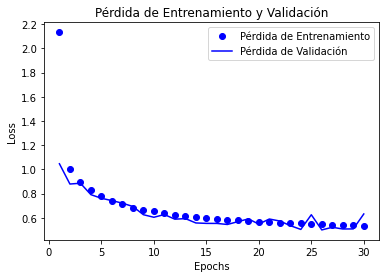

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

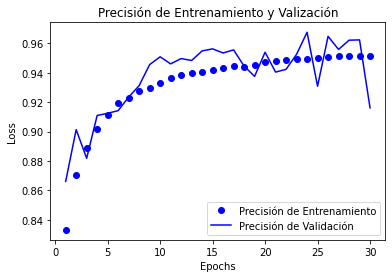

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [ ]:
network4 = crea_modelo(4)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network4 = compila_modelo(network4)

In [ ]:
historia4 = entrena_modelo(network4)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3148 - accuracy: 0.9082 - val_loss: 0.1415 - val_accuracy: 0.9606
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1552 - accuracy: 0.9542 - val_loss: 0.0845 - val_accuracy: 0.9758
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1175 - accuracy: 0.9645 - val_loss: 0.0671 - val_accuracy: 0.9798
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0977 - accuracy: 0.9707 - val_loss: 0.0558 - val_accuracy: 0.9844
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0879 - accuracy: 0.9740 - val_loss: 0.0454 - val_accuracy: 0.9878
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0789 - accuracy: 0.9767 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0725 - accuracy: 0.9777 - val_loss: 0.0332 - val_accuracy: 0.9894
Epoch 

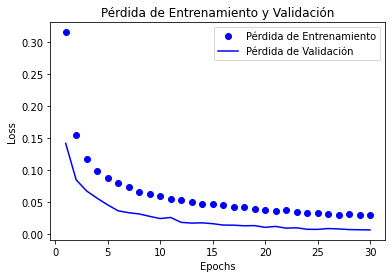

In [ ]:
pinta_perdida_entrenamiento_validacion(historia4)

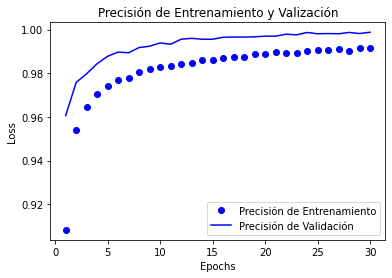

In [ ]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [ ]:
network5 = crea_modelo(5)

El numero debe estar entre 0-4


### CONCLUSIONES

El regularizador más eficaz es el **drop out**, el modelo se entrena adecuadamente con las 30 épocas, en ningún momento rozamos el sobreentrenamiento, como podemos observar en los demás casos. 
Entonces, podemos decir que para este tipo de casos es el mejor regularizador, el del **caso 4**. 
Con el último caso llegamos a una precisión de 0,9988.